# Study of impact on mobility: the impact of construction sites on pedestrian traffic (for Grand Central area, Manhattan, 2016)

## Analytical framework

### Ekaterina Levitskaya, Principles of Urban Informatics, December 2016

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Step 1. Start by visualizing time series of a monthly pedestrian count data (June 2016)

### Pedestrian count data is obtained from a website of a business improvement district, Grand Central Partnership. (http://www.grandcentralpartnership.nyc/about/reports-and-data)

In [66]:
June = pd.read_csv("/home/cusp/el2666/Projects/Pedestrian_Madison.csv")
June

,Date,Pedestrian
0,5/30/2016,13300
1,5/31/2016,31306
2,6/1/2016,34823
3,6/2/2016,31598
4,6/3/2016,27543
5,6/4/2016,12778
6,6/5/2016,8480
7,6/6/2016,30013
8,6/7/2016,31291
9,6/8/2016,32997


In [67]:
June.Date = pd.to_datetime(June.Date) #converting values to datetime

(array([16951, 16953, 16978]), <a list of 3 Text xticklabel objects>)

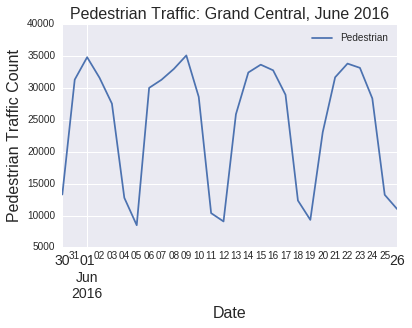

In [68]:
June.set_index('Date').plot()
plt.xlabel('Date', fontsize=16)
plt.ylabel('Pedestrian Traffic Count', fontsize=16)
plt.title('Pedestrian Traffic: Grand Central, June 2016', fontsize=16)
plt.xticks(fontsize = 14)

### In this caption we can see a consistent pattern of peaks of pedestrian activity during weekdays and low pedestrian activity on the weekends. Taking into account the characteristics of the neighborhood as a workplace hub, this pattern makes sense.

## Step 2. To check for seasonality changes, run time series for a full year of pedestrian count data. Because of time constraints for this study, author chose to use 1 representative month per season: June = Summer, April = Spring, October = Fall, January = Winter.

### Run the same algorithm for data processing as  for June (above) for the data for April, October and January 2016.

### The results are the following:

(array([16804, 16831]), <a list of 2 Text xticklabel objects>)

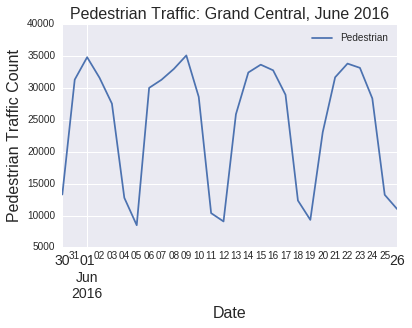

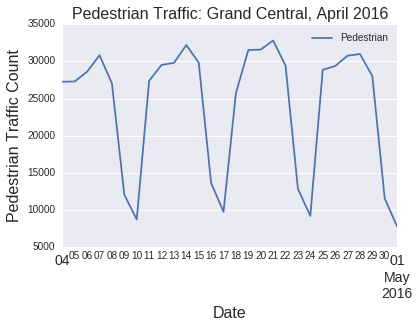

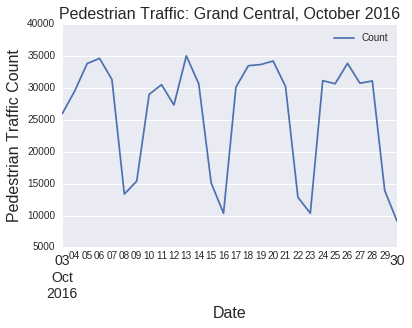

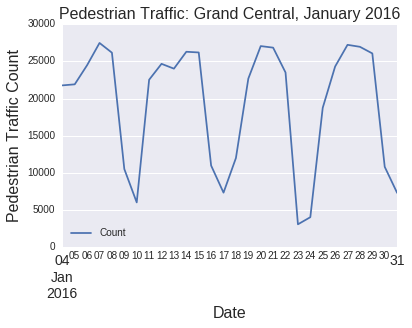

In [84]:
June.set_index('Date').plot()
plt.xlabel('Date', fontsize=16)
plt.ylabel('Pedestrian Traffic Count', fontsize=16)
plt.title('Pedestrian Traffic: Grand Central, June 2016', fontsize=16)
plt.xticks(fontsize = 14)

April.set_index('Date').plot()
plt.xlabel('Date', fontsize=16)
plt.ylabel('Pedestrian Traffic Count', fontsize=16)
plt.title('Pedestrian Traffic: Grand Central, April 2016', fontsize=16)
plt.xticks(fontsize = 14)

October.set_index('Date').plot()
plt.xlabel('Date', fontsize=16)
plt.ylabel('Pedestrian Traffic Count', fontsize=16)
plt.title('Pedestrian Traffic: Grand Central, October 2016', fontsize=16)
plt.xticks(fontsize = 14)

January.set_index('Date').plot()
plt.xlabel('Date', fontsize=16)
plt.ylabel('Pedestrian Traffic Count', fontsize=16)
plt.title('Pedestrian Traffic: Grand Central, January 2016', fontsize=16)
plt.xticks(fontsize = 14)

### This caption shows that across seasons the pattern of pedestrian traffic stays the same: with peaks during weekdays and lows during weekend. 

### Using a method of small multiples visualization, it could be helpful to visualize the full year, for an even more complete picture (next step in author's study, allowing for more time).

## Step 3. Now that we have looked at weather and identified that there are no seasonal changes in pedestrian traffic data, it is possible to move next to see whether there are significant changes in amount of pedestrian traffic before and after the beginning of construction works. 

### Construction site data is obtained from NYC Open Data, "Building Permits" database (https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a). A radius of one block from pedestrian count location was chosen to identify relevant construction sites.

### Visualizing two normal distributions of pedestrian traffic (before/after) through histograms:

### 1. Pedestrian count (June 2016) on days before construction

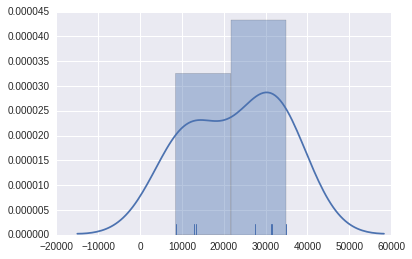

In [9]:
no_construction = [13300, 31306, 34823, 31598, 27543, 12778, 8480]
sns.distplot(no_construction, rug=True);

### 2. Pedestrian count (June 2016) on days after beginning of construction

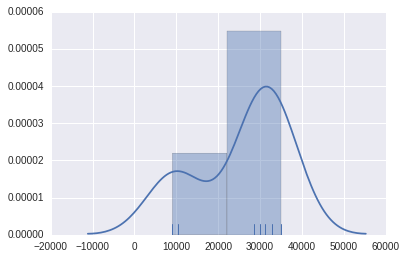

In [85]:
construction = [30013, 31291, 32997, 35100, 28605, 10373, 9071]
sns.distplot(construction, rug=True);

### Statistical testing: T-test and one-way ANOVA

### Significance level is set at a = 0.05

In [87]:
stats.ttest_ind(construction, no_construction, axis=0, equal_var=True)

Ttest_indResult(statistic=0.4324871244483986, pvalue=0.67305765886654245)

### The t-test measures whether the average value differs significantly across samples. In this case we observe a large p-value (p > 0.05), therefore, we cannot reject the null hypothesis of identical average scores.

In [121]:
stats.f_oneway(construction, no_construction)

F_onewayResult(statistic=0.27269707855863373, pvalue=0.6059493769442108)

### The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 

### One-way Analysis of Variance (ANOVA) confirms that differences in pedestrian volume are not significant (p > 0.05)

# Conclusion

## From statistical results we can conclude that construction works do not have a significant impact on the amount of pedestrian traffic in Grand Central area. This could be explained by the specific characteristics of this urban area - it's a workplace hub (calling themselves a "working heart of Manhattan"), therefore, as a neighborhood they can expect to have a consistent amount (and pattern) of pedestrian traffic regardless of such interventions as construction sites. 

## As other research studies show, construction sites may influence pedestrian traffic in the neighborhoods that are mainly characterized by visitor attractiveness activities (more leisurely activites such as museums, restaurants, retail), but as this study shows for urban areas similar to Grand Central as workplace hubs, construction works most likely won't have a significant impact on pedestrian traffic.

# Additional Study: Twitter data and Pedestrian Traffic - could tweets be a proxy of density?

## Additional study has been conducted to see whether collected geo-tagged tweets in Grand Central area during June-July 2016 have any correlation with pedestrian traffic in the same area.

In [11]:
tweets_per_day_june_july = [1027, 1239, 1367, 1467, 1528, 1786, 1513, 1363, 1178, 1581, 1538, 1552, 1719, 1457, 1779, 1191, 1142, 1271, 1512, 1409, 1358]

In [12]:
pedestrian_per_day_june_july = [85555, 190732, 213202, 212687, 215378, 209910, 106652, 88368, 198428, 203380, 216561, 218904, 209534, 114404, 118293, 50080, 111140, 111601, 114706, 109369, 58793]

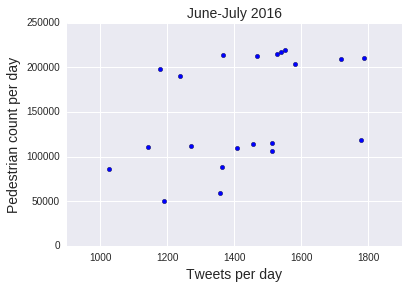

In [13]:
x = tweets_per_day_june_july
y = pedestrian_per_day_june_july

plt.scatter(x,y)
plt.xlabel('Tweets per day', fontsize=14)
plt.ylabel('Pedestrian count per day', fontsize=14)
plt.title('June-July 2016', fontsize=14)

### In this plot we can observe two distinctive groups of points. These groups describe Twitter behavior for weekdays (group 1) and weekends (group 2).

### Group 1 (weekdays):

mean of ratios: 0.01195568185 

std dev: 0.00113359626

### Group 2 (weekends):

mean of ratios: 0.02221983375

std dev: 0.003539298691



## This study shows a possibility that geo-tagged tweets could be representative of a certain amount of pedestrian traffic. Further research on more granular data could be conducted to confirm this hypotheses.